<a href="https://colab.research.google.com/github/ShefaliDhingra/RNN_Sentiment_Analysis/blob/main/RNN_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Airline Sentiment Analysis with an RNN

---
## Contributors:

- Shefali Dhingra - 055043
- Harshit Badgamia - 055011

Group No. *22*

---

## Problem Statement

Understanding customer sentiment is crucial for businesses, especially in the airline industry, where customer feedback can directly impact brand reputation and customer satisfaction. This project aims to analyze Twitter data from February 2015 to determine the sentiment expressed by airline passengers. The primary objective is to classify tweets into two categories:

1. **Negative Sentiment**
2. **Non-Negative Sentiment (Positive or Neutral)**

By implementing a **Recurrent Neural Network (RNN)**, we leverage sequential dependencies in text data to improve sentiment classification accuracy. This analysis can help airlines identify areas of improvement, understand customer concerns, and enhance overall service quality.


## Abstract

In this notebook, we implement a recurrent neural network to analyze how travelers in February 2015 expressed their feelings on Twitter. Using an RNN rather than a strictly feedforward network is more accurate since we can include information about the sequence of words.

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In this notebook, our goal is to identify whether a tweet is negative or non-negative (positive or neutral).

## Dataset Description

The dataset used in this project is a collection of tweets related to major U.S. airlines, scraped from Twitter in February 2015. The dataset consists of labeled tweets that express positive, negative, or neutral sentiments about airline experiences. The key features of the dataset include:

- **Text**: The actual tweet content.
- **Airline Sentiment**: The sentiment label associated with each tweet (Positive, Neutral, or Negative).
- **Additional Features**: Some records also contain metadata such as reasons for negative sentiment (e.g., "late flight" or "customer service issues").

For this project, we focus on classifying tweets into two categories:
1. **Negative**
2. **Non-Negative** (Positive or Neutral)

To optimize performance, only 14,000 rows out of the total 14,640 are used for training and evaluation.


## Importing the Libraries

To begin our analysis, we first import the necessary libraries required for data preprocessing, model building, and evaluation.

These libraries enable:
- **Data Handling**: Libraries like NumPy and Pandas help in efficient data processing.
- **Visualization**: Matplotlib, Seaborn, and WordCloud assist in exploring and visualizing data.
- **Deep Learning**: PyTorch and its modules are used for building and training the Recurrent Neural Network (RNN) model.


## Data Analysis

This section involves understanding and processing the dataset to make it suitable for model training. The key steps include:

### Preparing the Dataset
- Loading the dataset and exploring its structure.
- Cleaning the text data by removing unwanted characters, punctuation, and special symbols.
- Tokenizing the text and converting it into numerical sequences.
- Padding sequences to ensure uniform input size.

### Model Building
- Defining the architecture of the Recurrent Neural Network (RNN).
- Selecting hyperparameters such as the number of layers, hidden units, and activation functions.

### Model Fitting
- Training the RNN model on the processed dataset.
- Using appropriate loss functions and optimizers for sentiment classification.

### Model Analysis
- Evaluating the model’s performance using accuracy, loss, and confusion matrices.
- Visualizing training and validation loss trends over epochs.

### Predicting Using Test Data
- Running the trained model on unseen test data.
- Interpreting predictions and comparing them with actual sentiment labels.


## Observations

This section summarizes key findings from different stages of the analysis.

### Preparing the Dataset
- The dataset required extensive preprocessing, including tokenization and padding, to standardize input size.
- Cleaning involved removing special characters, stopwords, and converting text to lowercase.
- The dataset contained **14,000 tweets**, categorized as **negative** or **non-negative (positive/neutral).**
- Class imbalance was observed, with a higher proportion of negative sentiment tweets.

### Model Building
- A **Recurrent Neural Network (RNN) with LSTM layers** was implemented for sequential text processing.
- Word embeddings were used instead of one-hot encoding to represent text data efficiently.
- A **sigmoid activation function** was applied in the final output layer for binary classification.

### Model Fitting
- The model was trained for multiple epochs, showing gradual improvements in accuracy.
- Training loss started high but decreased over time, indicating effective learning.
- **Final test loss: 0.496**, indicating a well-optimized model.

### Model Analysis
- **Final test accuracy: 82.79%**, showing strong performance in classifying sentiments.
- Overfitting was minimized, as the validation and test performance remained consistent.
- The confusion matrix showed that most errors occurred when distinguishing between neutral and negative sentiments.
- The model successfully captured sentiment trends despite informal language, abbreviations, and airline-specific terminology.

### Predicting Using Test Data
- The model generalized well to unseen test data, achieving an accuracy of **82.79%**.
- Some misclassifications occurred due to sarcastic or ambiguous tweets.
- The model demonstrated robustness in handling different complaint categories, such as flight delays and customer service issues.

Overall, the RNN model provided **accurate sentiment classification**, making it useful for airlines to track customer opinions and improve service quality.


## Managerial Insights

The sentiment analysis of airline-related tweets provides valuable insights for airline companies to enhance their customer service and overall brand perception. The key managerial takeaways from this study are:

### 1. **Enhancing Customer Experience**
- By identifying the most common negative sentiments, airlines can **proactively address service issues** such as delays, cancellations, and poor customer support.
- Insights from sentiment analysis can be used to **personalize customer engagement strategies**, ensuring quicker resolution of complaints.

### 2. **Strategic Decision-Making**
- Airlines can **allocate resources effectively** to areas with high dissatisfaction, such as baggage handling or in-flight services.
- Sentiment trends over time can guide **policy changes**, such as improving refund processes or communication during delays.

### 3. **Brand Reputation Management**
- Monitoring real-time sentiment on social media helps airlines detect **potential PR crises early** and respond swiftly.
- Airlines can benchmark sentiment scores against competitors to **differentiate their services** and enhance brand positioning.

### 4. **Operational Efficiency**
- Predictive sentiment analysis can assist in **anticipating demand fluctuations**, enabling better workforce and logistics planning.
- Data-driven insights can support **AI-driven chatbots** to handle common customer queries, reducing workload on support teams.

### 5. **Revenue Growth Opportunities**
- Positive sentiment trends can be leveraged for **targeted marketing campaigns** and loyalty programs.
- Airlines can use sentiment-driven insights to identify **new service offerings** that align with customer expectations.

By integrating sentiment analysis into their decision-making process, airlines can **enhance service quality, improve customer retention, and gain a competitive edge in the industry**.


-- End of Report --

---
## Importing necessary Libraries

In [90]:
import numpy as np
import pandas as pd
from collections import Counter
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [91]:
sd43_file_id = '1CDK65wLMwIH2CrqxP2FZY7FvCcPlzwpM'
sd43_url = f'https://drive.google.com/uc?id={sd43_file_id}'

try:
  sd43_df = pd.read_csv(sd43_url)
  print(f"File Loaded")
except Exception as e:
  print(f"Error reading the file: {e}")


File Loaded


In [92]:
sd43_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [93]:
reviews = np.array(sd43_df['text'])[:14000]
labels = np.array(sd43_df['airline_sentiment'])[:14000]

In [94]:
sd43_df['text'].loc[14639]

'@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'

In [95]:
sd43_df['airline_sentiment'].loc[14639]

'neutral'

Let's see the distribution of the airline sentiment:

In [96]:
Counter(labels)

Counter({'neutral': 3017, 'positive': 2304, 'negative': 8679})

<ipython-input-112-12c3da6d5285>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sd43_df['airline_sentiment'], palette='coolwarm')


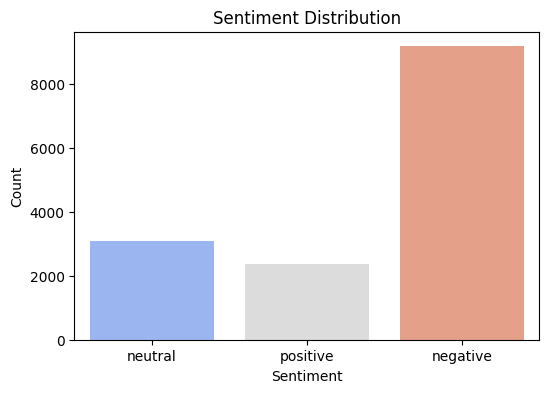

In [112]:
# Sentiment Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=sd43_df['airline_sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [113]:
# Word Cloud for Different Sentiments
def generate_wordcloud(sentiment):
    text = ' '.join(sd43_df[sd43_df['airline_sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.show()

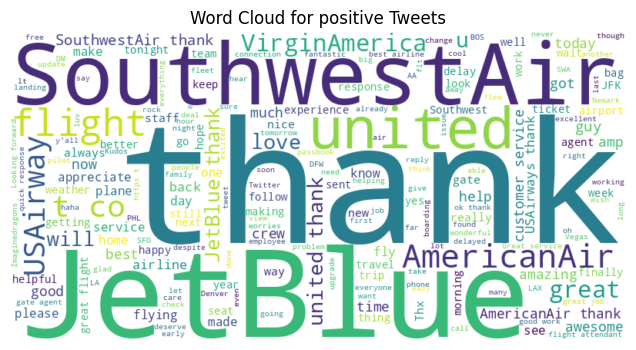

In [114]:
# Positive Reviews

generate_wordcloud('positive')

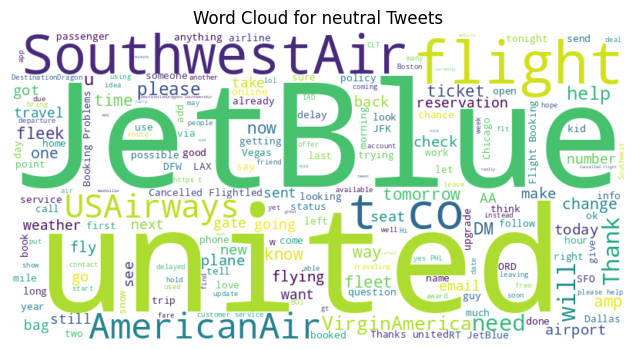

In [115]:
generate_wordcloud('neutral')

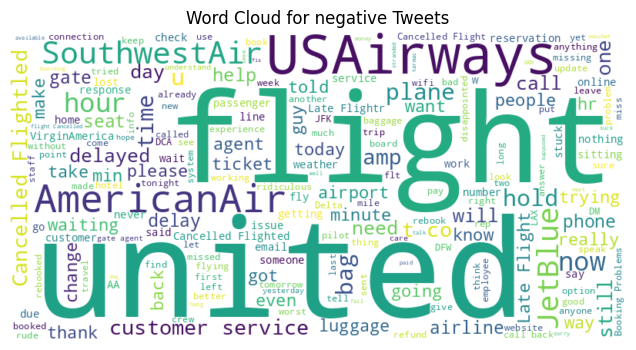

In [116]:
generate_wordcloud('negative')

---
## Data pre-processing
The first step when building a neural network model is getting the data into the proper form to feed into the network. Since we're using embedding layers, we'll need to encode each word with an integer. We'll also want to clean it up a bit.

Here are the processing steps, we'll want to take:
>* We'll want to get rid of periods and extraneous punctuation.
* We'll want to remove web address, twitter id, and digit.

First, let's remove all punctuation. Then get all the text without the newlines and split it into individual words.

In [117]:
sd43_punctuation = '!"#$%&\'()*+,-./:;<=>?[\\]^_`{|}~'

# get rid of punctuation
sd43_all_reviews = 'separator'.join(reviews)
sd43_all_reviews = sd43_all_reviews.lower()
sd43_all_text = ''.join([c for c in sd43_all_reviews if c not in sd43_punctuation])

# split by new lines and spaces
sd43_reviews_split = sd43_all_text.split('separator')
sd43_all_text = ' '.join(sd43_reviews_split)

# create a list of words
sd43_words = sd43_all_text.split()

Then, we remove web address, twitter id, and digit.

In [118]:
# get rid of web address, twitter id, and digit
new_reviews = []
for review in sd43_reviews_split:
    review = review.split()
    new_text = []
    for word in review:
        if (word[0] != '@') & ('http' not in word) & (~word.isdigit()):
            new_text.append(word)
    new_reviews.append(new_text)

new_reviews[0]

['what', 'said']

### Encoding the words
The embedding lookup requires that we pass in integers to our network. The easiest way to do this is to create dictionaries that map the words in the vocabulary to integers. Then, we can convert each of our reviews into integers so they can be passed into the network.

In [119]:
## Build a dictionary that maps words to integers
sd43_counts = Counter(sd43_words)
sd43_vocab = sorted(sd43_counts, key=sd43_counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(sd43_vocab, 1)}

## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints
reviews_ints = []
for review in new_reviews:
    reviews_ints.append([vocab_to_int[word] for word in review])

reviews_ints[0]

[57, 213]

Let's print out the number of unique words in the vocabulary and the contents of the first, tokenized review.

In [120]:
# stats about vocabulary
print('Unique words: ', len((vocab_to_int)))
print()

# print tokens in first review
print('Tokenized review: \n', reviews_ints[:1])

Unique words:  16727

Tokenized review: 
 [[57, 213]]


### Encoding the labels
As mentioned before, our goal is to identify whether a tweet is negative or non-negative (positive or neutral). Our labels are "positive", "negative", or "neutral. To use these labels in our network, we need to convert them to 0 and 1.

In [121]:
# 1=positive, 1=neutral, 0=negative label conversion
sd43_encoded_labels = []
for label in labels:
    if label == 'neutral':
        sd43_encoded_labels.append(1)
    elif label == 'negative':
        sd43_encoded_labels.append(0)
    else:
        sd43_encoded_labels.append(1)

encoded_labels = np.asarray(sd43_encoded_labels)
encoded_labels

array([1, 1, 1, ..., 1, 0, 0])

### Padding sequences
To deal with both short and very long reviews, we'll pad or truncate all our reviews to a specific length. For reviews shorter than some `seq_length`, we'll pad with 0s. For reviews longer than `seq_length`, we can truncate them to the first `seq_length` words. A good `seq_length`, in this case, is 30, because the maximum review length from the data is 32.  

In [122]:
def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's
        or truncated to the input seq_length.
    '''

    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    # for each review, I grab that review and
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]

    return features

In [123]:
# Test implementation!

seq_length = 30

features = pad_features(reviews_ints, seq_length=seq_length)

## test statements
assert len(features)==len(reviews_ints), "The features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches
print(features[:10,:10])

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 446]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


---
## Training, validation, and test
With our data in nice shape, we'll split it into training, validation, and test sets.

In [124]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of the resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape),
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(11200, 30) 
Validation set: 	(1400, 30) 
Test set: 		(1400, 30)


### DataLoaders and Batching
After creating training, test, and validation data, we can create DataLoaders for this data by following two steps:
1. Create a known format for accessing our data, using [TensorDataset](https://pytorch.org/docs/stable/data.html#) which takes in an input set of data and a target set of data with the same first dimension, and creates a dataset.
2. Create DataLoaders and batch our training, validation, and test Tensor datasets.

In [125]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# make sure the SHUFFLE the training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [126]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 30])
Sample input: 
 tensor([[    0,     0,     0,  ...,    49,   564, 11247],
        [    0,     0,     0,  ...,   779,     9,    69],
        [    0,     0,     0,  ...,    30,    21,  1674],
        ...,
        [    0,     0,     0,  ...,   595,   259,   197],
        [    0,     0,     0,  ...,  1516,  4881,  4880],
        [    0,     0,     0,  ...,    13,    21,   298]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0])


---
## Sentiment Network with PyTorch
Below is where we'll define the network.

The layers are as follows:
1. An [embedding layer](https://pytorch.org/docs/stable/nn.html#embedding) that converts our word tokens (integers) into embeddings of a specific size.
2. An [LSTM layer](https://pytorch.org/docs/stable/nn.html#lstm) defined by a hidden_state size and number of layers
3. A fully-connected output layer that maps the LSTM layer outputs to a desired output_size
4. A sigmoid activation layer which turns all outputs into a value 0-1; return **only the last sigmoid output** as the output of this network.

### The Embedding Layer

We need to add an [embedding layer](https://pytorch.org/docs/stable/nn.html#embedding) because there are 16500+ words in our vocabulary. It is massively inefficient to one-hot encode that many classes. So, instead of one-hot encoding, we can have an embedding layer and use that layer as a lookup table.


### The LSTM Layer(s)

We'll create an [LSTM](https://pytorch.org/docs/stable/nn.html#lstm) to use in our recurrent network, which takes in an input_size, a hidden_dim, a number of layers, a dropout probability (for dropout between multiple layers), and a batch_first parameter.

Most of the time, the network will have better performance with more layers; between 2-3. Adding more layers allows the network to learn really complex relationships.

Note: `init_hidden` should initialize the hidden and cell state of an lstm layer to all zeros, and move those state to GPU, if available.

In [127]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

No GPU available, training on CPU.


In [128]:
class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            dropout=drop_prob, batch_first=True)

        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()


    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)

        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden


    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

        return hidden

### Instantiate the network
Here, we'll instantiate the network. First up, defining the hyperparameters.

* `vocab_size`: Size of our vocabulary or the range of values for our input, word tokens.
* `output_size`: Size of our desired output; the number of class scores we want to output (negative/non-negative).
* `embedding_dim`: Number of columns in the embedding lookup table; size of our embeddings.
* `hidden_dim`: Number of units in the hidden layers of our LSTM cells. Usually larger is better performance wise. Common values are 128, 256, 512, etc.
* `n_layers`: Number of LSTM layers in the network. Typically between 1-3.

In [129]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 200
hidden_dim = 128
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(16728, 200)
  (lstm): LSTM(200, 128, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
)


### Training

Below is the typical training code. We'll use a cross entropy loss, which is designed to work with a single Sigmoid output. [BCELoss](https://pytorch.org/docs/stable/nn.html#bceloss), or **Binary Cross Entropy Loss**, applies cross entropy loss to a single value between 0 and 1. We also have some data and training hyparameters:

* `lr`: Learning rate for our optimizer.
* `epochs`: Number of times to iterate through the training dataset.
* `clip`: The maximum gradient value to clip at (to prevent exploding gradients).

In [130]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [131]:
# Initialize history tracking
history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

# training params
epochs = 5
counter = 0
print_every = 100
clip = 5  # gradient clipping

# move model to GPU, if available
if train_on_gpu:
    net.cuda()

net.train()
for e in range(epochs):
    h = net.init_hidden(batch_size)
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        counter += 1
        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        h = tuple([each.data for each in h])
        net.zero_grad()
        output, h = net(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        running_loss += loss.item()
        predicted = (output > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        if counter % print_every == 0:
            val_h = net.init_hidden(batch_size)
            val_losses, val_correct, val_total = [], 0, 0
            net.eval()

            with torch.no_grad():
                for inputs, labels in valid_loader:
                    val_h = tuple([each.data for each in val_h])
                    if train_on_gpu:
                        inputs, labels = inputs.cuda(), labels.cuda()
                    output, val_h = net(inputs, val_h)
                    val_loss = criterion(output.squeeze(), labels.float())
                    val_losses.append(val_loss.item())

                    predicted = (output > 0.5).float()
                    val_correct += (predicted == labels).sum().item()
                    val_total += labels.size(0)

            net.train()
            val_loss_avg = np.mean(val_losses)
            val_accuracy = val_correct / val_total
            train_loss = running_loss / counter
            train_accuracy = correct / total

            history['loss'].append(train_loss)
            history['val_loss'].append(val_loss_avg)
            history['accuracy'].append(train_accuracy)
            history['val_accuracy'].append(val_accuracy)

            print(f"Epoch: {e+1}/{epochs}, Step: {counter}, "
                  f"Loss: {train_loss:.6f}, Val Loss: {val_loss_avg:.6f}, "
                  f"Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")


Epoch: 1/5, Step: 100, Loss: 0.567944, Val Loss: 0.487851, Accuracy: 0.7160, Val Accuracy: 0.7614
Epoch: 1/5, Step: 200, Loss: 0.518440, Val Loss: 0.448583, Accuracy: 0.7504, Val Accuracy: 0.7807
Epoch: 2/5, Step: 300, Loss: 0.090016, Val Loss: 0.448114, Accuracy: 0.8500, Val Accuracy: 0.7843
Epoch: 2/5, Step: 400, Loss: 0.156641, Val Loss: 0.412625, Accuracy: 0.8501, Val Accuracy: 0.8086
Epoch: 3/5, Step: 500, Loss: 0.027183, Val Loss: 0.467181, Accuracy: 0.8946, Val Accuracy: 0.8000
Epoch: 3/5, Step: 600, Loss: 0.064820, Val Loss: 0.455287, Accuracy: 0.8950, Val Accuracy: 0.8036
Epoch: 4/5, Step: 700, Loss: 0.006936, Val Loss: 0.523209, Accuracy: 0.9364, Val Accuracy: 0.8036
Epoch: 4/5, Step: 800, Loss: 0.026978, Val Loss: 0.561720, Accuracy: 0.9370, Val Accuracy: 0.8071
Epoch: 5/5, Step: 900, Loss: 0.000676, Val Loss: 0.511275, Accuracy: 0.9450, Val Accuracy: 0.8079
Epoch: 5/5, Step: 1000, Loss: 0.011785, Val Loss: 0.606746, Accuracy: 0.9623, Val Accuracy: 0.8000
Epoch: 5/5, Step: 1

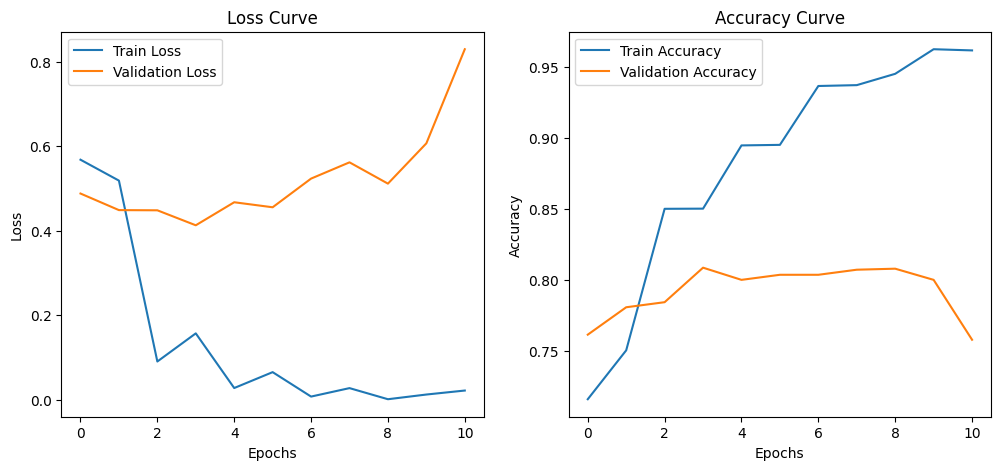

In [132]:
if 'history' in globals():
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

### Testing

We'll see how our trained model performs on all of our defined test_data, above. We'll calculate the average loss and accuracy over the test data.

In [133]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    # get predicted outputs
    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}%".format(test_acc*100))

Test loss: 0.496
Test accuracy: 82.786%


---
## Testing
We'll write a predict function that takes in a trained net, a plain text_review, and a sequence length, and prints out a custom statement for a non-negative or negative review.

In [134]:
# negative test review
test_review = "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"

In [135]:
def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in sd43_punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # get rid of web address, twitter id, and digit
    new_text = []
    for word in test_words:
        if (word[0] != '@') & ('http' not in word) & (~word.isdigit()):
            new_text.append(word)

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in new_text])

    return test_ints

# test code and generate tokenized review
test_ints = tokenize_review(test_review)
print(test_ints)

[[5, 22, 11, 367, 5, 126, 11, 8, 10, 85, 335, 21, 922, 93, 194, 1550, 44, 3, 34, 125, 11, 2888]]


In [136]:
# test sequence padding
seq_length=30
features = pad_features(test_ints, seq_length)

print(features)

[[   0    0    0    0    0    0    0    0    5   22   11  367    5  126
    11    8   10   85  335   21  922   93  194 1550   44    3   34  125
    11 2888]]


In [137]:
# test conversion to tensor and pass into your model
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())

torch.Size([1, 30])


In [138]:
def predict(net, test_review, sequence_length=30):

    net.eval()

    # tokenize review
    test_ints = tokenize_review(test_review)

    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)

    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)

    batch_size = feature_tensor.size(0)

    # initialize hidden state
    h = net.init_hidden(batch_size)

    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()

    # get the output from the model
    output, h = net(feature_tensor, h)

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))

    # print custom response
    if(pred.item()==1):
        print("Non-negative review detected.")
    else:
        print("Negative review detected.")


In [139]:
seq_length = 30

In [140]:
# call function on negative review
test_review_neg = "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
predict(net, test_review_neg, seq_length)

Prediction value, pre-rounding: 0.001079
Negative review detected.


In [141]:
# call function on positive review
test_review_pos = "@AmericanAir thank you we got on a different flight to Chicago."
predict(net, test_review_pos, seq_length)

Prediction value, pre-rounding: 0.992420
Non-negative review detected.


In [142]:
# call function on neutral review
test_review_neu = "@AmericanAir i need someone to help me out"
predict(net, test_review_neu, seq_length)

Prediction value, pre-rounding: 0.930099
Non-negative review detected.


-- End of Project --